# Ejercicio 1: Regresión Lineal Simple desde Cero

In [56]:
#Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [57]:
#Cargar los datos
url = "https://www.statlearning.com/s/Advertising.csv"
df =pd.read_csv(url)
print(df.head())

#Definir las variables independientes y dependientes
X = df['TV'].values
y = df['sales'].values

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [58]:
# Definir la función de regresión lineal simple y su entrenamiento
def regresion_lineal_simple(X, y, lr=0.01, epochs=1000, verbose=True):
    w = np.random.randn()  #Valor inicial aleatorio
    b =np.random.randn()  # Valor inicial aleatorio

    for i in range(epochs):
        y_pred = w * X + b
        error = y_pred - y
                
        #Calcula la pérdida
        perdida = np.mean((error) ** 2)
        
        # Calcula los gradientes
        w_gradiente = (2 / len(X)) * np.sum(X * error)
        b_gradiente = (2 / len(X)) * np.sum(error)
        
        #Actualiza los parámetros
        w -= lr * w_gradiente
        b -= lr * b_gradiente
        
        if verbose:
            print("Iteración:", i+1, "Pérdida:", round(perdida))
    
    #Mostrar los resultados
    plt.figure(figsize=(6,6))
    plt.scatter(X, y, color='blue', label='Datos originales')
    plt.plot(X, w * X + b, color='red', label='Recta ajustada')
    plt.xlabel('Publicidad en TV')
    plt.ylabel('Ventas')
    plt.title('Regresión Lineal Simple')
    plt.legend()
    plt.grid(True)
    plt.show()
    return w, b

Iteración: 1 Pérdida: 69535
Iteración: 2 Pérdida: 12335
Iteración: 3 Pérdida: 2203
Iteración: 4 Pérdida: 408
Iteración: 5 Pérdida: 90
Iteración: 6 Pérdida: 34
Iteración: 7 Pérdida: 24
Iteración: 8 Pérdida: 22
Iteración: 9 Pérdida: 22
Iteración: 10 Pérdida: 22
Iteración: 11 Pérdida: 22
Iteración: 12 Pérdida: 22
Iteración: 13 Pérdida: 22
Iteración: 14 Pérdida: 22
Iteración: 15 Pérdida: 22
Iteración: 16 Pérdida: 22
Iteración: 17 Pérdida: 22
Iteración: 18 Pérdida: 22
Iteración: 19 Pérdida: 22
Iteración: 20 Pérdida: 22
Iteración: 21 Pérdida: 22
Iteración: 22 Pérdida: 22
Iteración: 23 Pérdida: 22
Iteración: 24 Pérdida: 22
Iteración: 25 Pérdida: 22
Iteración: 26 Pérdida: 22
Iteración: 27 Pérdida: 22
Iteración: 28 Pérdida: 22
Iteración: 29 Pérdida: 22
Iteración: 30 Pérdida: 22
Iteración: 31 Pérdida: 22
Iteración: 32 Pérdida: 22
Iteración: 33 Pérdida: 22
Iteración: 34 Pérdida: 22
Iteración: 35 Pérdida: 22
Iteración: 36 Pérdida: 22
Iteración: 37 Pérdida: 22
Iteración: 38 Pérdida: 22
Iteración: 3

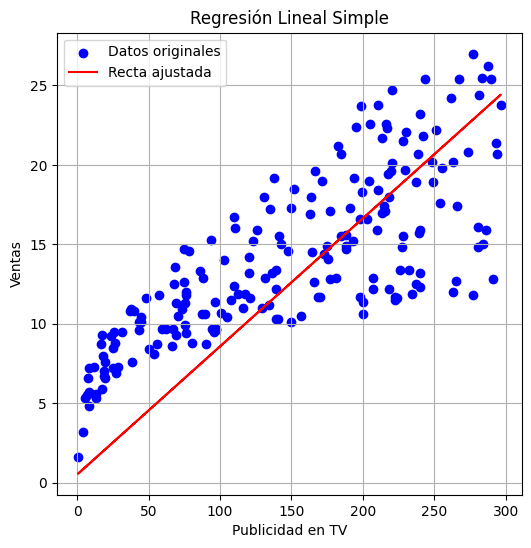


Parámetros entrenados:
Pendiente (w): 0.08070656802868029
Sesgo (b): 0.5008324109999943


In [59]:
# Entrenamiento del modelo de regresión lineal simple
# Tuve que ajustar el learning rate y epochs ya que con los valores originales no convergía y daba error
w, b = regresion_lineal_simple(X, y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados:")
print(f"Pendiente (w): {w}")
print(f"Sesgo (b): {b}")

# Ejercicio 2: Regresión Lineal Múltiple desde Cero

In [60]:
#Definir las variables independientes y dependientes. El dataset es el mismo que en el ejercicio anterior
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [61]:
# Definir la función de regresión múltiple y su entrenamiento
def regresion_lineal_multiple(X, y, lr=0.01, epochs=1000, verbose=True):
    muestras, variables = X.shape
    w = np.random.randn(variables)  #Valores iniciales aleatorios
    b = np.random.randn()           # Valor inicial aleatorio

    for i in range(epochs):
        y_pred = X @ w + b
        error = y_pred - y

        #Calcula la pérdida 
        perdida = np.mean((error) ** 2)
        
        # Calcula los gradientes
        w_gradiente = (2 / muestras) * (X.T @ error)
        b_gradiente = (2 / muestras) * np.sum(error)
        
        #Actualiza los parámetros
        w -= lr * w_gradiente
        b -= lr * b_gradiente
        
        if verbose:
            print("Iteración:", i+1, "Pérdida:", round(perdida, 4))
    return w, b

In [62]:
# Entrenamiento del modelo de regresión lineal múltiple
# Al igual que el ejercicio anterior, tuve que ajustar el learning rate y epochs ya que con los valores originales no convergía y daba error
w, b = regresion_lineal_multiple(X, y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados:")
print(f"Pendiente (w): {w}")
print(f"Sesgo (b): {b}")

Iteración: 1 Pérdida: 24410.0046
Iteración: 2 Pérdida: 3906.7411
Iteración: 3 Pérdida: 670.1959
Iteración: 4 Pérdida: 158.0548
Iteración: 5 Pérdida: 75.8181
Iteración: 6 Pérdida: 61.4562
Iteración: 7 Pérdida: 57.8464
Iteración: 8 Pérdida: 55.9745
Iteración: 9 Pérdida: 54.4169
Iteración: 10 Pérdida: 52.9477
Iteración: 11 Pérdida: 51.5301
Iteración: 12 Pérdida: 50.1571
Iteración: 13 Pérdida: 48.8265
Iteración: 14 Pérdida: 47.5367
Iteración: 15 Pérdida: 46.2865
Iteración: 16 Pérdida: 45.0747
Iteración: 17 Pérdida: 43.9
Iteración: 18 Pérdida: 42.7613
Iteración: 19 Pérdida: 41.6575
Iteración: 20 Pérdida: 40.5874
Iteración: 21 Pérdida: 39.55
Iteración: 22 Pérdida: 38.5443
Iteración: 23 Pérdida: 37.5693
Iteración: 24 Pérdida: 36.6241
Iteración: 25 Pérdida: 35.7076
Iteración: 26 Pérdida: 34.819
Iteración: 27 Pérdida: 33.9575
Iteración: 28 Pérdida: 33.1222
Iteración: 29 Pérdida: 32.3122
Iteración: 30 Pérdida: 31.5268
Iteración: 31 Pérdida: 30.7653
Iteración: 32 Pérdida: 30.0267
Iteración: 33 Pé

In [63]:
#crear un modelo de regresión lineal usando scikit-learn
modelo_sci = LinearRegression()

# Ajustar el modelo a los datos
modelo_sci.fit(X, y)

#Mostrar los resultados
print("Pendientes sklearn:")
print(modelo_sci.coef_)
print("Sesgo sklearn:")
print(modelo_sci.intercept_)


Pendientes sklearn:
[ 0.04576465  0.18853002 -0.00103749]
Sesgo sklearn:
2.938889369459412


In [64]:
# Mostrar resultados de sklearn
print("Pendientes sklearn:")
print(modelo_sci.coef_)

print("Sesgo sklearn:")
print(modelo_sci.intercept_)

# Mostrar resultados sin sklearn
print("Pendientes modelo:")
print(w)
print("Sesgo modelo:")
print(b)


Pendientes sklearn:
[ 0.04576465  0.18853002 -0.00103749]
Sesgo sklearn:
2.938889369459412
Pendientes modelo:
TV           0.051519
radio        0.212796
newspaper    0.011722
dtype: float64
Sesgo modelo:
0.8307279119823412


### Comentarios sobre los resultados

- Al comparar los parámetros aprendidos del modelo implementado y el de sklearn, se observa que las pendientes obtenidas son bastante similares, lo que indica que el modelo está captando la relación entre las variables de entrada y la salida.
- Sin embargo, el sesgo (b) obtenido por el modelo propio es significativamente más bajo que el de sklearn, lo que sugiere que todavía no se ha alcanzado una convergencia total.
- Esta diferencia en el sesgo puede deberse a un número de iteraciones insuficiente o a un learning rate que podría ajustarse.
- Para acercarse más a los resultados de sklearn, sería recomendable aumentar el número de iteraciones o ajustar el learning rate para mejorar la convergencia.
- En resumen, el modelo es capaz de aproximarse a los coeficientes de sklearn, pero necesita más ajuste para igualar el sesgo.

In [65]:
# Caso 1: learning rate pequeño
w, b = regresion_lineal_multiple(X, y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 1:")
print(f"Pendiente caso 1 (w): {w}")
print(f"Sesgo caso 1(b): {b}")

Iteración: 1 Pérdida: 10944.8817
Iteración: 2 Pérdida: 3529.1112
Iteración: 3 Pérdida: 2306.4774
Iteración: 4 Pérdida: 2062.6274
Iteración: 5 Pérdida: 1974.7854
Iteración: 6 Pérdida: 1913.0837
Iteración: 7 Pérdida: 1856.9838
Iteración: 8 Pérdida: 1803.1989
Iteración: 9 Pérdida: 1751.1654
Iteración: 10 Pérdida: 1700.7511
Iteración: 11 Pérdida: 1651.8928
Iteración: 12 Pérdida: 1604.5399
Iteración: 13 Pérdida: 1558.645
Iteración: 14 Pérdida: 1514.1622
Iteración: 15 Pérdida: 1471.0474
Iteración: 16 Pérdida: 1429.2577
Iteración: 17 Pérdida: 1388.7516
Iteración: 18 Pérdida: 1349.4889
Iteración: 19 Pérdida: 1311.4306
Iteración: 20 Pérdida: 1274.539
Iteración: 21 Pérdida: 1238.7777
Iteración: 22 Pérdida: 1204.1112
Iteración: 23 Pérdida: 1170.5053
Iteración: 24 Pérdida: 1137.9269
Iteración: 25 Pérdida: 1106.3437
Iteración: 26 Pérdida: 1075.7246
Iteración: 27 Pérdida: 1046.0395
Iteración: 28 Pérdida: 1017.2593
Iteración: 29 Pérdida: 989.3555
Iteración: 30 Pérdida: 962.3009
Iteración: 31 Pérdida:

In [66]:
# Caso 2: learning rate más alto
w, b = regresion_lineal_multiple(X, y, lr=0.0001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 2:")
print(f"Pendiente caso 2 (w): {w}")
print(f"Sesgo caso 2 (b): {b}")

Iteración: 1 Pérdida: 7196.1361
Iteración: 2 Pérdida: 161840.9793
Iteración: 3 Pérdida: 4076964.0085
Iteración: 4 Pérdida: 103052032.1606
Iteración: 5 Pérdida: 2605059472.6757
Iteración: 6 Pérdida: 65853655762.9235
Iteración: 7 Pérdida: 1664723723389.4106
Iteración: 8 Pérdida: 42082782634101.41
Iteración: 9 Pérdida: 1063816517692529.2
Iteración: 10 Pérdida: 2.6892365772417944e+16
Iteración: 11 Pérdida: 6.798158562213408e+17
Iteración: 12 Pérdida: 1.7185159620428685e+19
Iteración: 13 Pérdida: 4.344260412241056e+20
Iteración: 14 Pérdida: 1.0981916343058118e+22
Iteración: 15 Pérdida: 2.7761339128312577e+23
Iteración: 16 Pérdida: 7.017827545957841e+24
Iteración: 17 Pérdida: 1.774046390095672e+26
Iteración: 18 Pérdida: 4.4846365539777997e+27
Iteración: 19 Pérdida: 1.1336775144977619e+29
Iteración: 20 Pérdida: 2.8658391631264964e+30
Iteración: 21 Pérdida: 7.244594696356919e+31
Iteración: 22 Pérdida: 1.8313711735736433e+33
Iteración: 23 Pérdida: 4.629548671760868e+34
Iteración: 24 Pérdida: 1.

C:\Users\PC\AppData\Local\Temp\ipykernel_6816\274258218.py:23: RuntimeWarning: overflow encountered in multiply
  print("Iteración:", i+1, "Pérdida:", round(perdida, 4))
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Iteración: 625 Pérdida: nan
Iteración: 626 Pérdida: nan
Iteración: 627 Pérdida: nan
Iteración: 628 Pérdida: nan
Iteración: 629 Pérdida: nan
Iteración: 630 Pérdida: nan
Iteración: 631 Pérdida: nan
Iteración: 632 Pérdida: nan
Iteración: 633 Pérdida: nan
Iteración: 634 Pérdida: nan
Iteración: 635 Pérdida: nan
Iteración: 636 Pérdida: nan
Iteración: 637 Pérdida: nan
Iteración: 638 Pérdida: nan
Iteración: 639 Pérdida: nan
Iteración: 640 Pérdida: nan
Iteración: 641 Pérdida: nan
Iteración: 642 Pérdida: nan
Iteración: 643 Pérdida: nan
Iteración: 644 Pérdida: nan
Iteración: 645 Pérdida: nan
Iteración: 646 Pérdida: nan
Iteración: 647 Pérdida: nan
Iteración: 648 Pérdida: nan
Iteración: 649 Pérdida: nan
Iteración: 650 Pérdida: nan
Iteración: 651 Pérdida: nan
Iteración: 652 Pérdida: nan
Iteración: 653 Pérdida: nan
Iteración: 654 Pérdida: nan
Iteración: 655 Pérdida: nan
Iteración: 656 Pérdida: nan
Iteración: 657 Pérdida: nan
Iteración: 658 Pérdida: nan
Iteración: 659 Pérdida: nan
Iteración: 660 Pérdi

In [67]:
# Caso 3: learning rate más pequeño
w, b = regresion_lineal_multiple(X, y, lr=0.000001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 3:")
print(f"Pendiente caso 3(w): {w}")
print(f"Sesgo caso 3(b): {b}")

Iteración: 1 Pérdida: 28599.4622
Iteración: 2 Pérdida: 25544.4521
Iteración: 3 Pérdida: 22845.8743
Iteración: 4 Pérdida: 20462.0558
Iteración: 5 Pérdida: 18356.1963
Iteración: 6 Pérdida: 16495.7982
Iteración: 7 Pérdida: 14852.1637
Iteración: 8 Pérdida: 13399.9504
Iteración: 9 Pérdida: 12116.779
Iteración: 10 Pérdida: 10982.8868
Iteración: 11 Pérdida: 9980.822
Iteración: 12 Pérdida: 9095.1731
Iteración: 13 Pérdida: 8312.3307
Iteración: 14 Pérdida: 7620.2765
Iteración: 15 Pérdida: 7008.3976
Iteración: 16 Pérdida: 6467.3218
Iteración: 17 Pérdida: 5988.7729
Iteración: 18 Pérdida: 5565.4422
Iteración: 19 Pérdida: 5190.8757
Iteración: 20 Pérdida: 4859.3739
Iteración: 21 Pérdida: 4565.9038
Iteración: 22 Pérdida: 4306.0208
Iteración: 23 Pérdida: 4075.7999
Iteración: 24 Pérdida: 3871.7752
Iteración: 25 Pérdida: 3690.8859
Iteración: 26 Pérdida: 3530.4292
Iteración: 27 Pérdida: 3388.0181
Iteración: 28 Pérdida: 3261.5448
Iteración: 29 Pérdida: 3149.148
Iteración: 30 Pérdida: 3049.1841
Iteración: 3

### Comentarios sobre el impacto del learning rate

- En el caso 1 (learning rate = 0.00001), los valores obtenidos para las pendientes y el sesgo son los que más se acercan a los resultados de referencia de sklearn.
- En el caso 2 (learning rate = 0.0001), el modelo no ha aprendido: aparecen valores NaN e infinitos. 
- En el caso 3 (learning rate = 0.000001), aunque los resultados son numéricos, las pendientes y el sesgo están lejos de los valores de sklearn. Esto se debe a que el learning rate es demasiado bajo y el modelo no se ajusta del todo bien.